In [1]:
import numpy as np, pandas as pd
import glob

import matplotlib.pyplot as plt
import seaborn as sns
import mypackages as mp

import sklearn

# Data Load

In [2]:
df_main = mp.fileListLoad('Data/all/*.sas7bdat')
df_sup = mp.fileListLoad('Data/sup/*.sas7bdat')

In [3]:
df_2019 = df_main[0].copy()
df_2020 = df_main[1].copy()
df_2021 = df_main[2].copy()

df_2019_sup = df_sup[0].copy()
df_2020_sup = df_sup[1].copy()
df_2021_sup = df_sup[2].copy()

In [4]:
#merge files
df_2019_fsup = mp.toOneRow(df_2019_sup, mp.sumlist, mp.droplist)

df_2019f = pd.merge(df_2019, df_2019_fsup, how = 'left')

df_2019f.drop(columns = 'mod_d', inplace = True)
df_2019f['LS_SUP'].fillna(0.0, inplace = True)


df_2020_fsup = mp.toOneRow(df_2020_sup, mp.sumlist, mp.droplist)

df_2020f = pd.merge(df_2020, df_2020_fsup, how = 'left')

df_2020f.drop(columns = 'mod_d', inplace = True)
df_2020f['LS_SUP'].fillna(0.0, inplace = True)


df_2021_fsup = mp.toOneRow(df_2021_sup, mp.sumlist, mp.droplist)

df_2021f = pd.merge(df_2021, df_2021_fsup, how = 'left')

df_2021f.drop(columns = 'mod_d', inplace = True)
df_2021f['LS_SUP'].fillna(0.0, inplace = True)

C:\Users\Na\AppData\Local\Temp\ipykernel_42972\3209443826.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2019f['LS_SUP'].fillna(0.0, inplace = True)
C:\Users\Na\AppData\Local\Temp\ipykernel_42972\3209443826.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [5]:
df = pd.concat([df_2019f, df_2020f, df_2021f])

In [6]:
df = df.reset_index()
df.drop(columns='index', inplace=True)

해당 전처리의 근거는 `fileload.ipynb`에서 확인할 수 있다.

# Process

In [7]:
df.drop(columns=['psu'], inplace=True)

앞서 삭제한 `mod_d`는 최종 수정 일정을 나타내는 변수이고, `ID`와 `ID_fam`은 각각 개인 key, 가족 key이며, `psu`는 조사구역 자체의 번호이다.

Text(0.5, 1.0, 'Number of region for each group')

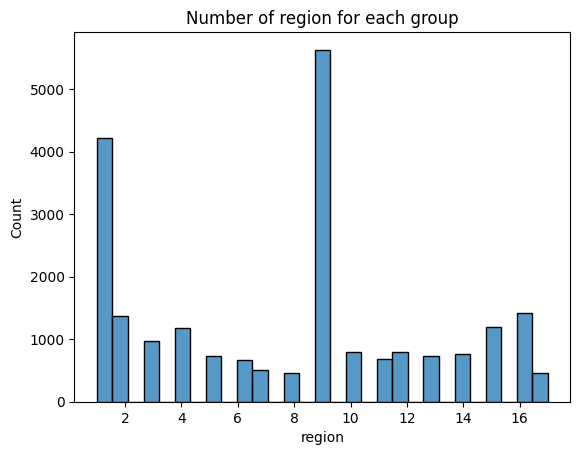

In [8]:
#region
df['region']

sns.histplot(x = 'region', data = df)
plt.title('Number of region for each group')

region은 1부터 17까지 각 지역을 숫자로 나타낸 것이다. 각 숫자의 의미는 원시자료 이용지침서를 통해 알 수 있다.

1은 서울이고, 9는 경기도이다.

0.7980850214991799


Text(0.5, 1.0, 'Number of town_t for each group')

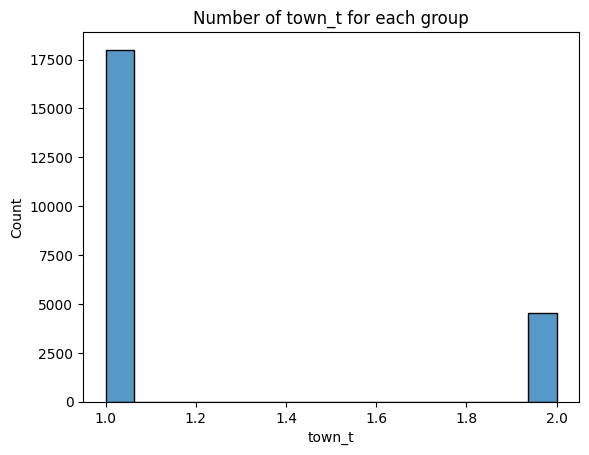

In [9]:
#town_t
print(df[df['town_t'] == 1.0]['town_t'].sum()/df['town_t'].count())
sns.histplot(x = 'town_t', data = df)
plt.title('Number of town_t for each group')

town_t가 1.0인 경우 행정구역 '동'을, 2.0일 경우 '읍/면'을 나타낸다.

0.43024956779999113


Text(0.5, 1.0, 'Number of apt_t for each group')

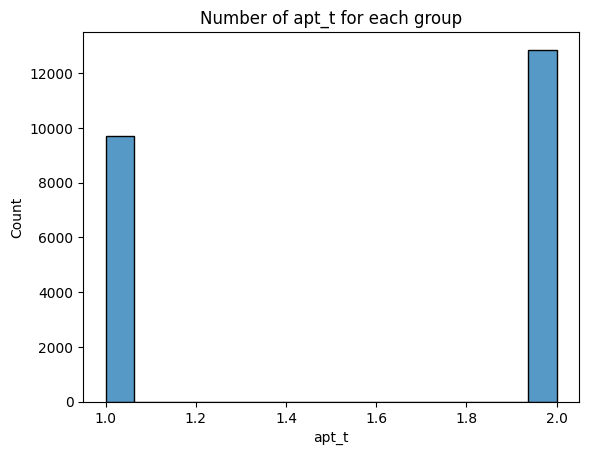

In [10]:
#apt_t
print(df[df['apt_t'] == 1.0]['apt_t'].sum()/df['apt_t'].count())
sns.histplot(x = 'apt_t', data = df)
plt.title('Number of apt_t for each group')

apt_t가 1인 경우 '일반'을, 2인 경우 '아파트'를 나타낸다.

In [11]:
#age, age_month
print(df[df['age'] == 1.0]['age'].sum())
df['age_month'].isna().sum()

152.0


21391

age_month는 월령으로, 만 1세부터 6세까지만 표기되는 정보이다. 해당 분석에서 age가 '만 나이'를 나타내므로, age에 12를 곱하고 6을 더한 값을 임의로 7세 이상인 자의 월령으로 표기하여 해당 월령으로 분석을 진행한다. 

In [12]:
df[df['age_month'].notna() & df['LS_SUP'] == 1]

,ID,ID_fam,year,region,town_t,apt_t,sex,age,age_month,incm,...,T_VHIT_EX_L,T_VHIT_EX_L_1,T_VHIT_GA_R,T_VHIT_GA_L,T_VHIT_COR_R,T_VHIT_COR_L,T_SOds,E_RT,E_CT,E_CLC_T
38,b'A751327503',b'A7513275',2019.0,1.0,1.0,1.0,2.0,5.0,71.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,b'A752339406',b'A7523394',2019.0,1.0,1.0,1.0,2.0,2.0,28.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,b'A752371705',b'A7523717',2019.0,1.0,1.0,1.0,2.0,6.0,79.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,b'A752371706',b'A7523717',2019.0,1.0,1.0,1.0,2.0,3.0,46.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,b'A753213603',b'A7532136',2019.0,1.0,1.0,2.0,1.0,6.0,72.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22453,b'R902232303',b'R9022323',2021.0,8.0,1.0,2.0,1.0,3.0,39.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22456,b'R902242503',b'R9022425',2021.0,8.0,1.0,2.0,2.0,2.0,24.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22468,b'R902325803',b'R9023258',2021.0,8.0,1.0,2.0,1.0,1.0,21.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22497,b'R903339404',b'R9033394',2021.0,8.0,2.0,1.0,2.0,6.0,76.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df['age_month'].fillna(df['age']*12 + 6, inplace=True)
df.drop(columns = ['age'], inplace = True)

C:\Users\Na\AppData\Local\Temp\ipykernel_42972\1836661723.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age_month'].fillna(df['age']*12 + 6, inplace=True)


(array([4512.,    0., 4472.,    0.,    0., 4501.,    0., 4490.,    0.,
        4478.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

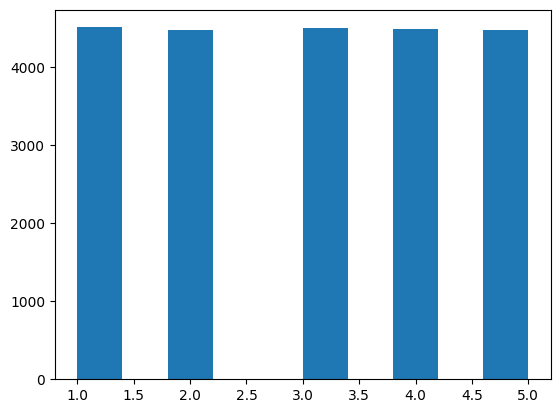

In [14]:
#incm, ho_incm, incm5, ho_incm5

plt.hist(x = 'incm5', data = df)

In [15]:
df[df['incm5'].isna()]

,ID,ID_fam,year,region,town_t,apt_t,sex,age_month,incm,ho_incm,...,T_VHIT_EX_L,T_VHIT_EX_L_1,T_VHIT_GA_R,T_VHIT_GA_L,T_VHIT_COR_R,T_VHIT_COR_L,T_SOds,E_RT,E_CT,E_CLC_T
881,b'A771273102',b'A7712731',2019.0,1.0,1.0,2.0,2.0,714.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1042,b'A774252703',b'A7742527',2019.0,1.0,1.0,1.0,1.0,378.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1078,b'A775211901',b'A7752119',2019.0,1.0,1.0,2.0,1.0,918.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1079,b'A775211902',b'A7752119',2019.0,1.0,1.0,2.0,2.0,522.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1347,b'A781315601',b'A7813156',2019.0,1.0,1.0,1.0,2.0,870.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21317,b'M904334301',b'M9043343',2021.0,14.0,2.0,1.0,2.0,966.0,NaN,NaN,...,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21341,b'M905213601',b'M9052136',2021.0,14.0,1.0,2.0,1.0,318.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,b'888'
21367,b'M906200001',b'M9062000',2021.0,14.0,2.0,1.0,2.0,966.0,NaN,NaN,...,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22351,b'P904196601',b'P9041966',2021.0,17.0,1.0,1.0,2.0,966.0,NaN,NaN,...,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(array([3006.,    0., 4036.,    0.,    0., 4904.,    0., 5288.,    0.,
        5219.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

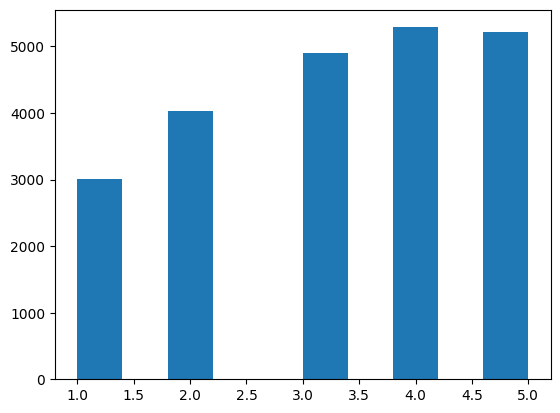

In [16]:
plt.hist(x = 'ho_incm5', data = df)

In [17]:
df[df['ho_incm5'].isna()]

,ID,ID_fam,year,region,town_t,apt_t,sex,age_month,incm,ho_incm,...,T_VHIT_EX_L,T_VHIT_EX_L_1,T_VHIT_GA_R,T_VHIT_GA_L,T_VHIT_COR_R,T_VHIT_COR_L,T_SOds,E_RT,E_CT,E_CLC_T
881,b'A771273102',b'A7712731',2019.0,1.0,1.0,2.0,2.0,714.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1042,b'A774252703',b'A7742527',2019.0,1.0,1.0,1.0,1.0,378.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1078,b'A775211901',b'A7752119',2019.0,1.0,1.0,2.0,1.0,918.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1079,b'A775211902',b'A7752119',2019.0,1.0,1.0,2.0,2.0,522.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1347,b'A781315601',b'A7813156',2019.0,1.0,1.0,1.0,2.0,870.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21317,b'M904334301',b'M9043343',2021.0,14.0,2.0,1.0,2.0,966.0,NaN,NaN,...,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21341,b'M905213601',b'M9052136',2021.0,14.0,1.0,2.0,1.0,318.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,b'888'
21367,b'M906200001',b'M9062000',2021.0,14.0,2.0,1.0,2.0,966.0,NaN,NaN,...,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22351,b'P904196601',b'P9041966',2021.0,17.0,1.0,1.0,2.0,966.0,NaN,NaN,...,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.drop(columns = ['incm', 'ho_incm'], inplace=True)

incm은 소득 4분위, ho_incm은 가구소득 4분위, incm5는 소득 5분위, ho_incm5는 가구소득 5분위이다. 이 값들의 경우 조사 시점이 아닌 2023년을 기준으로 한 값이므로 실제 결과와 다를 수 있음이 원시자료 이용지침서에 명시되어 있다. 그러나, 해당 값을 처리하기 위한 특별한 수단이 없으므로 해당 값을 사용한다.

소득 4분위 대신 소득 5분위를 사용하기로 한다. 이는 정보의 손실을 줄이기 위함이다.

원래 소득분위는 전체 가구 혹은 개인을 4등분 혹은 5등분한 값이므로 히스토그램 분포가 이산균등분포에 가까워야 한다. 그러나 해당 자료에서는 가구소득에서는 이와 같은 결과가 나오지 않았는데, 이는 한국의 소득분위가 '기준 중위소득'을 기준으로 일정 백분율 값을 정하는 구조이기 때문일 것으로 보인다.

이 값은 NAN이 존재하며, 해당 값의 처리 방안에 대해서는 아래의 `allownc` 부분을 참고하라.

(array([6076.,    0.,    0., 2114.,    0.,    0., 5756.,    0.,    0.,
        6329.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

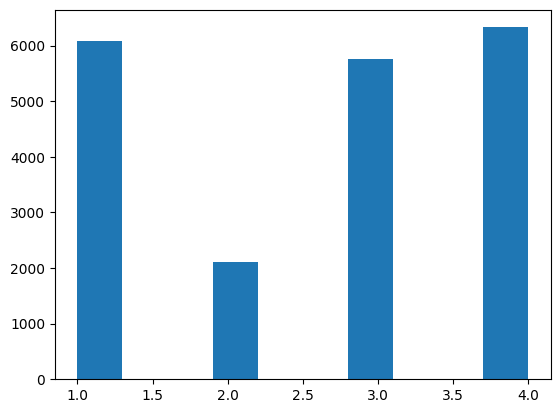

In [19]:
#edu, occp

plt.hist(x = 'edu', data = df)

edu는 교육 수준 컬럼이다. 중졸<고졸<대졸 이상 순으로 많고, 특이사항으로 '초졸 이하'가 많은 편이다. 이와 같은 상황이 발생한 이유를 살펴보면...

<Axes: xlabel='edu', ylabel='age_month'>

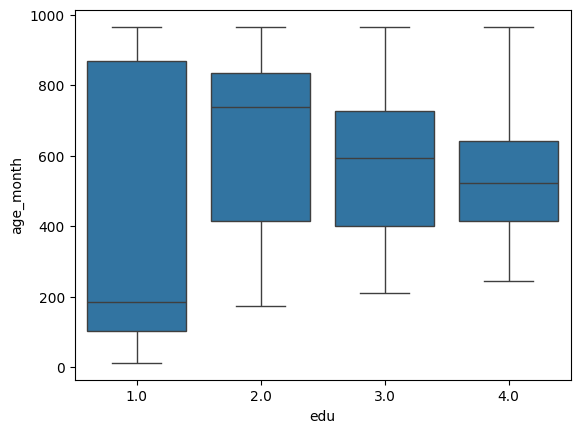

In [20]:
sns.boxplot(x = 'edu', y = 'age_month', data = df)

교육 수준 1.0과 2.0, 즉 초졸 이하와 중졸까지는 고연령층에서 비중이 높은 것을 알 수 있다. 특히, 중졸 수준 학력을 가진사람이 고연령층에서 특히 많은 것을 보인다. 

In [21]:
df[df['edu'].isna()]

,ID,ID_fam,year,region,town_t,apt_t,sex,age_month,incm5,ho_incm5,...,T_VHIT_EX_L,T_VHIT_EX_L_1,T_VHIT_GA_R,T_VHIT_GA_L,T_VHIT_COR_R,T_VHIT_COR_L,T_SOds,E_RT,E_CT,E_CLC_T
4,b'A751220403',b'A7512204',2019.0,1.0,1.0,1.0,1.0,198.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,b'A751235703',b'A7512357',2019.0,1.0,1.0,1.0,1.0,426.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,b'A751327502',b'A7513275',2019.0,1.0,1.0,1.0,2.0,582.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,b'A751327503',b'A7513275',2019.0,1.0,1.0,1.0,2.0,71.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,b'A752339402',b'A7523394',2019.0,1.0,1.0,1.0,1.0,498.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22544,b'R904332602',b'R9043326',2021.0,8.0,2.0,2.0,2.0,534.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22545,b'R904332603',b'R9043326',2021.0,8.0,2.0,2.0,1.0,258.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22550,b'R904336005',b'R9043360',2021.0,8.0,2.0,2.0,2.0,954.0,5.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22551,b'R904339402',b'R9043394',2021.0,8.0,2.0,2.0,2.0,534.0,5.0,5.0,...,0.0,5.0,NaN,NaN,NaN,NaN,NaN,3.0,4.0,b'2'


한편, `edu` 칼럼은 상당히 NAN이 많은 컬럼이다. 따라서 

(array([2278., 1785.,    0., 2201.,    0.,  597., 1603.,    0., 1609.,
        7234.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

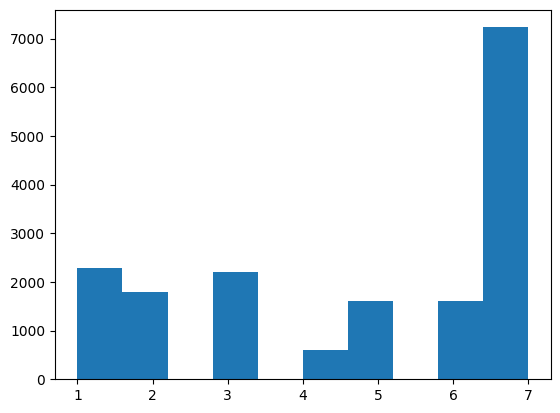

In [22]:
#occp
plt.hist(x = 'occp', data = df)

'기타'에 해당하는 7이 대부분이다. 기타는 무직을 지칭하므로, 1~6이 각 경제활동인구를 모두 포괄한다. 단, 이 컬럼은 이후의 `EC1_1`과 `EC_occp` 컬럼을 합쳐 정보를 모두 보존하는 처리를 할 수 있어 이에 대해서는 analysis 파트에서 해결하였다.

In [23]:
#wt_?? 시리즈, kstrata

해당 컬럼은 해당 자료의 특징인 '집락층화추출'로 인해 발생한 문제를 보정하기 위한 통계적 수치이고, 통계 분석을 직접 수행할 때는 변수로서의 의미를 가지지 않는다.

## 건강설문조사 - 가구조사

해당 컬럼부터는 '모름/무응답' 등이 NA 대신 9/999999 등으로 표기되어 있다. 따라서 해당 변수에서 이를 주의깊게 처리한다.

(array([2.6280e+03, 4.5990e+03, 2.8000e+02, 1.0332e+04, 0.0000e+00,
        2.1720e+03, 9.5200e+02, 1.5910e+03, 0.0000e+00, 5.0000e+00]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

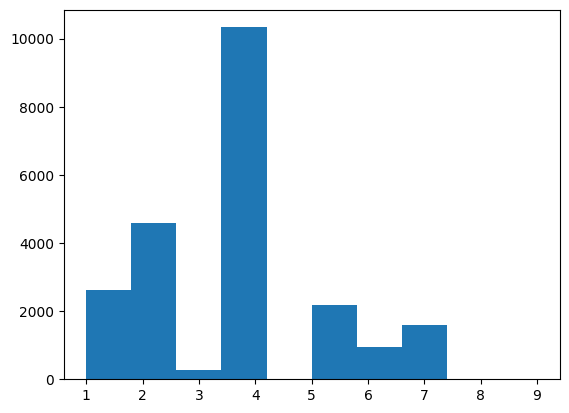

In [24]:
#genertn
plt.hist(x = 'genertn', data = df)

In [25]:
df[df['genertn'] == 9]

,ID,ID_fam,year,region,town_t,apt_t,sex,age_month,incm5,ho_incm5,...,T_VHIT_EX_L,T_VHIT_EX_L_1,T_VHIT_GA_R,T_VHIT_GA_L,T_VHIT_COR_R,T_VHIT_COR_L,T_SOds,E_RT,E_CT,E_CLC_T
9805,b'B808385301',b'B8083853',2020.0,2.0,1.0,1.0,1.0,474.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9806,b'B808385303',b'B8083853',2020.0,2.0,1.0,1.0,1.0,966.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17970,b'E902174501',b'E9021745',2021.0,5.0,1.0,2.0,1.0,582.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,b'888'
17971,b'E902174502',b'E9021745',2021.0,5.0,1.0,2.0,2.0,378.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17972,b'E902174503',b'E9021745',2021.0,5.0,1.0,2.0,1.0,114.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


가구 세대 구성을 알려 주는 더미이다.

(array([2.628e+03, 6.205e+03, 5.465e+03, 5.881e+03, 0.000e+00, 1.829e+03,
        5.460e+02, 0.000e+00, 0.000e+00, 5.000e+00]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

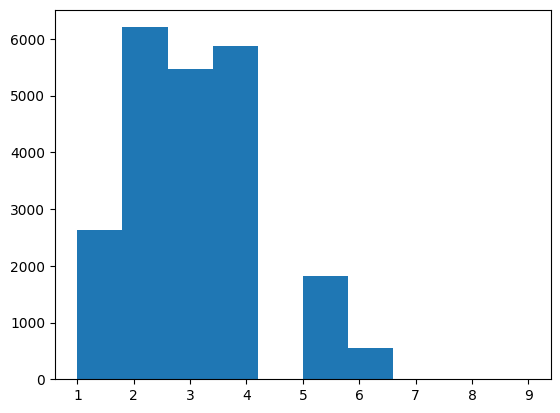

In [26]:
#cfam
plt.hist(x = 'cfam', data = df)

In [27]:
df[df['cfam'] == 9]

,ID,ID_fam,year,region,town_t,apt_t,sex,age_month,incm5,ho_incm5,...,T_VHIT_EX_L,T_VHIT_EX_L_1,T_VHIT_GA_R,T_VHIT_GA_L,T_VHIT_COR_R,T_VHIT_COR_L,T_SOds,E_RT,E_CT,E_CLC_T
9805,b'B808385301',b'B8083853',2020.0,2.0,1.0,1.0,1.0,474.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9806,b'B808385303',b'B8083853',2020.0,2.0,1.0,1.0,1.0,966.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17970,b'E902174501',b'E9021745',2021.0,5.0,1.0,2.0,1.0,582.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,b'888'
17971,b'E902174502',b'E9021745',2021.0,5.0,1.0,2.0,2.0,378.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17972,b'E902174503',b'E9021745',2021.0,5.0,1.0,2.0,1.0,114.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


가구 구성원 수를 나타내는 더미이다.

cfam과 genertn이 NA인 index는 서로 동일하다.

<Axes: xlabel='allownc', ylabel='Count'>

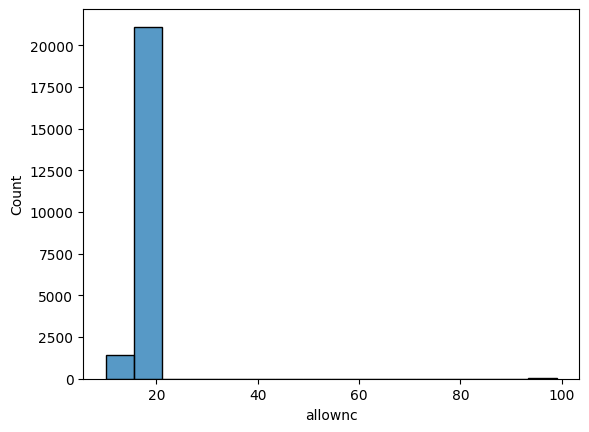

In [28]:
sns.histplot(x = 'allownc', data = df)

In [29]:
df[df['allownc'] == 99]

,ID,ID_fam,year,region,town_t,apt_t,sex,age_month,incm5,ho_incm5,...,T_VHIT_EX_L,T_VHIT_EX_L_1,T_VHIT_GA_R,T_VHIT_GA_L,T_VHIT_COR_R,T_VHIT_COR_L,T_SOds,E_RT,E_CT,E_CLC_T
1641,b'B753200002',b'B7532000',2019.0,2.0,1.0,1.0,1.0,234.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6551,b'L756259501',b'L7562595',2019.0,13.0,1.0,1.0,1.0,234.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7400,b'O753211901',b'O7532119',2019.0,16.0,2.0,1.0,2.0,966.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7409,b'O753327501',b'O7533275',2019.0,16.0,2.0,1.0,2.0,966.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7823,b'P751307101',b'P7513071',2019.0,17.0,1.0,2.0,2.0,510.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9805,b'B808385301',b'B8083853',2020.0,2.0,1.0,1.0,1.0,474.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9806,b'B808385303',b'B8083853',2020.0,2.0,1.0,1.0,1.0,966.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17097,b'B912290101',b'B9122901',2021.0,2.0,1.0,1.0,2.0,954.0,1.0,1.0,...,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17443,b'C908397201',b'C9083972',2021.0,3.0,1.0,2.0,2.0,966.0,NaN,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17970,b'E902174501',b'E9021745',2021.0,5.0,1.0,2.0,1.0,582.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,b'888'


기초생활수급 여부는 가구소득과 관련되어 있으므로, 이를 탐구해 보자.

<Axes: xlabel='allownc', ylabel='incm5'>

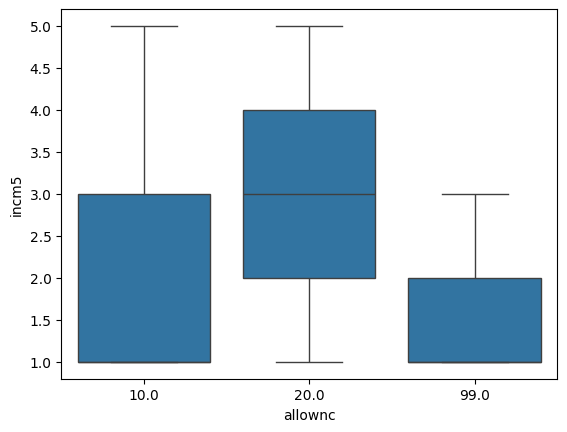

In [30]:
sns.boxplot(y = 'incm5', x = 'allownc', data = df)

boxplot 및 위의 표에서 확인할 수 있듯이, 해당 value가 99인 경우는 가구소득 분위가 낮거나 NaN으로 처리되어 아예 확인할 수도 없는 경우뿐이다. 따라서, 99.0을 임의로 10.0으로 대체하기로 하였다. 또한, 가구소득이 NaN인 경우 역시 존재하는데, 이 경우는 분석의 신뢰성을 담보하기 어려워 제거하였다.

In [31]:
df['allownc'] = df['allownc'].replace(99, 10)
df = df.dropna(subset=['incm5', 'ho_incm5']).reset_index()

(array([7.6220e+03, 1.1974e+04, 2.8550e+03, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

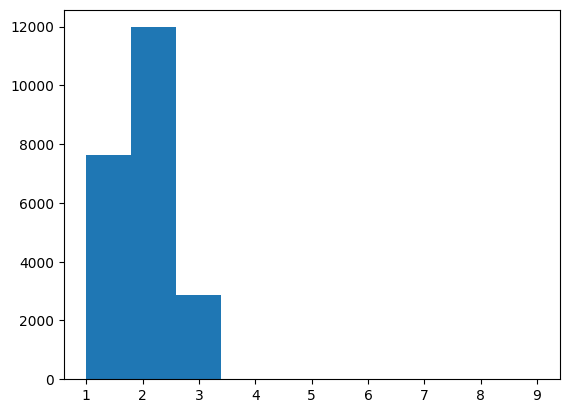

In [32]:
#house
plt.hist(df['house'])

In [33]:
df[df['house'] == 9]

,index,ID,ID_fam,year,region,town_t,apt_t,sex,age_month,incm5,...,T_VHIT_EX_L,T_VHIT_EX_L_1,T_VHIT_GA_R,T_VHIT_GA_L,T_VHIT_COR_R,T_VHIT_COR_L,T_SOds,E_RT,E_CT,E_CLC_T
10139,10183,b'C805354703',b'C8053547',2020.0,3.0,1.0,1.0,1.0,306.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14994,15064,b'O809380201',b'O8093802',2020.0,16.0,2.0,1.0,2.0,966.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


일반적인 관념과 달리, '1'이 주택 없음, '2'가 1채 보유, '3'이 2채 이상 보유이다. 9인 컬럼을 보면 incm과 ho_incm이 모두 1.0이므로 '1'로 대체하였다.

In [34]:
df['house'] = df['house'].replace(9, 1)

live_t, ainc_unit1, ainc_1, ainc의 경우, 개인이 직접 답하는 컬럼이므로 ho_incm5 등에 비해 신뢰성을 확보하기 어렵다고 판단해 제거하였다.

In [35]:
df.drop(columns = ['live_t', 'ainc_unit1', 'ainc_1', 'ainc'], inplace = True)

## 이환

In [36]:
#주관적 건강상태

df.drop(columns=['D_2_1', 'D_2_wk'], inplace=True)